In [ ]:
# Jason's work


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy
import requests
import os
import requests
import json



In [2]:
data = pd.read_csv("../project-1-group-10/Data/Tourism data by industry.csv")
labour_df = pd.DataFrame(data)
labour_df.dropna(inplace=True)
labour_df

,Tourism characteristic and connected industries,Sep-2004,Dec-2004,Mar-2005,Jun-2005,Sep-2005,Dec-2005,Mar-2006,Jun-2006,Sep-2006,...,Sep-2019,Dec-2019,Mar-2020,Jun-2020,Sep-2020,Dec-2020,Mar-2021,Jun-2021,Sep-2021,Dec-2021
0,Accommodation,98.0,98.3,93.1,88.6,84.9,86.6,84.8,80.6,91.4,...,93.0,100.9,91.9,77.6,77.6,80.9,80.9,91.0,82.6,94.4
1,"Cafes, restaurants and takeaway food services",125.2,132.3,134.9,136.2,137.7,138.2,128.3,127.4,137.8,...,222.6,233.8,221.9,189.3,207.7,215.1,227.8,224.5,195.4,229.2
2,"Clubs, pubs, taverns and bars",33.5,35.4,35.5,38.5,36.9,37.0,33.8,36.0,36.9,...,56.6,59.4,55.3,46.5,52.8,54.6,56.7,55.1,49.7,58.2
3,Rail transport,1.3,1.3,1.3,1.3,1.3,1.4,1.4,1.3,1.4,...,2.1,2.0,2.1,1.9,1.9,2.0,2.0,2.0,1.9,2.1
4,Road transport and transport equipment rental,6.0,6.0,6.4,6.4,6.5,6.5,6.6,6.6,6.7,...,7.7,7.4,7.5,6.5,6.8,7.0,7.1,7.1,6.5,7.3
5,"Air, water and other transport",26.4,26.9,27.8,27.8,28.1,28.5,28.9,28.6,28.9,...,34.3,34.8,32.1,25.4,19.5,20.2,24.7,24.9,21.7,24.2
6,Travel agency and information centre services,26.4,26.1,25.0,28.0,26.7,26.6,26.1,29.4,28.1,...,39.5,37.6,36.2,31.8,32.9,33.8,34.4,34.5,31.4,35.7
7,Cultural services,8.0,7.8,8.2,8.0,8.0,7.8,7.8,8.3,8.3,...,11.7,12.7,11.7,8.9,9.6,9.8,10.6,9.8,9.7,10.2
8,Casinos and other gambling services,3.0,2.9,3.1,3.0,3.0,2.9,2.9,3.0,3.1,...,4.0,4.0,3.9,3.5,3.4,3.6,3.6,3.7,3.4,3.8
9,Sports and recreation services,20.2,19.7,20.9,20.2,20.0,19.9,19.9,20.7,21.4,...,32.3,36.1,32.3,28.4,29.3,30.1,30.7,30.8,28.0,31.8


<function matplotlib.pyplot.show(close=None, block=None)>

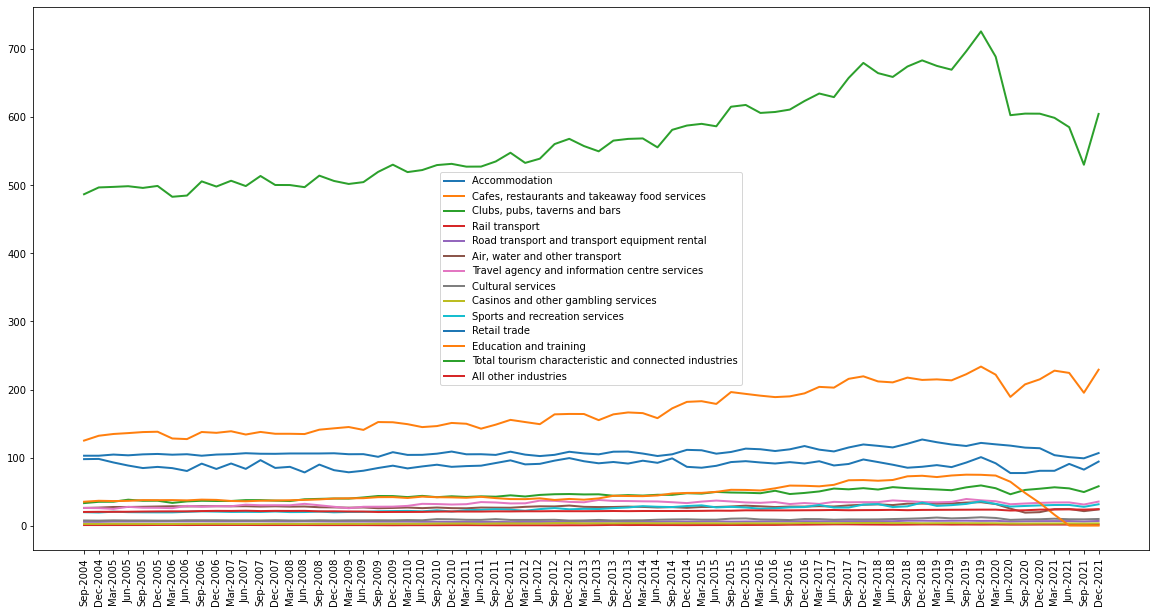

In [68]:
plt.figure(figsize=(20,10))
plot_df = labour_df.drop(labels=[14,15])

plot_df
labels=[]


for index,row in plot_df.iterrows():
    x_axis = plot_df.columns.values.tolist()
    x_axis.pop(0)
    y_axis = plot_df.loc[index,:].values.tolist()
    y_axis.pop(0)
    labels.append(plot_df.iloc[index,0])
    plt.plot(x_axis,y_axis, linewidth=2, markersize=2)
    plt.xticks(ticks=x_axis,rotation=90)
    

plt.legend(labels)
plt.show
    

In [ ]:
# Paul's work



In [ ]:
# Krystal's work

